In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Train.csv')

In [7]:
df.head(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [8]:
df.isnull().sum()

,0
ID,0
Warehouse_block,0
Mode_of_Shipment,0
Customer_care_calls,0
Customer_rating,0
Cost_of_the_Product,0
Prior_purchases,0
Product_importance,0
Gender,0
Discount_offered,0


In [4]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [6]:
df.dtypes

,0
ID,int64
Warehouse_block,object
Mode_of_Shipment,object
Customer_care_calls,int64
Customer_rating,int64
Cost_of_the_Product,int64
Prior_purchases,int64
Product_importance,object
Gender,object
Discount_offered,int64


In [9]:
df.nunique()

,0
ID,10999
Warehouse_block,5
Mode_of_Shipment,3
Customer_care_calls,6
Customer_rating,5
Cost_of_the_Product,215
Prior_purchases,8
Product_importance,3
Gender,2
Discount_offered,65


In [10]:
df.shape

(10999, 12)

####Visualizations to get insights of data

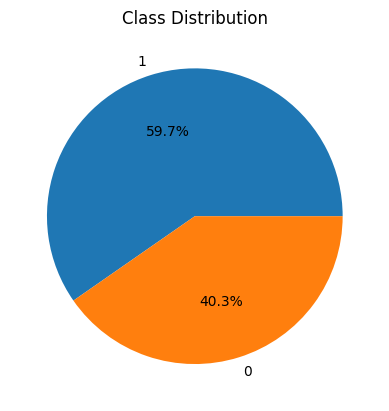

In [14]:
plt.pie(df['Reached.on.Time_Y.N'].value_counts(), labels=df['Reached.on.Time_Y.N'].value_counts().index, autopct='%1.1f%%')
plt.title("Class Distribution")
plt.show()

Conclusion:

1 --> Product has not reached on time

0 --> Product has reached on time

As per given data most of products has not reached on time

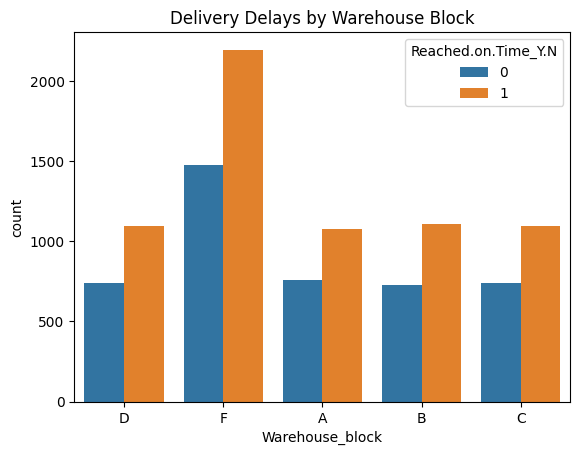

In [15]:
sns.countplot(data=df, x='Warehouse_block', hue='Reached.on.Time_Y.N')
plt.title('Delivery Delays by Warehouse Block')
plt.show()

Conclusion:

Tells us Which warehouse has more late deliveries

So Warehouse_block F has more late deliveries

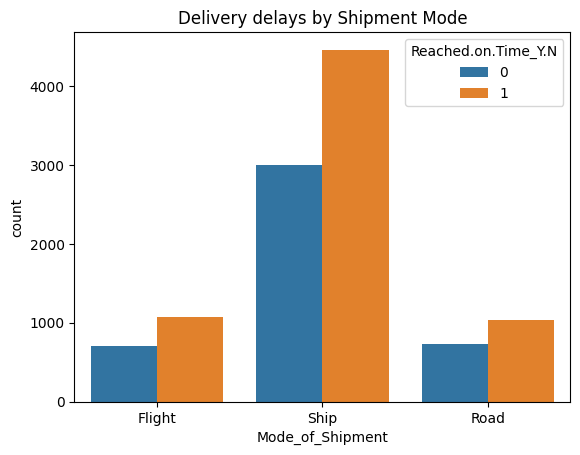

In [16]:
sns.countplot(data=df, x='Mode_of_Shipment', hue='Reached.on.Time_Y.N')
plt.title('Delivery delays by Shipment Mode')
plt.show()

Conclusion:

Tells us Which mode (Air/Ship/Road) is most reliable

So ship mode is mostly used and is most reliable

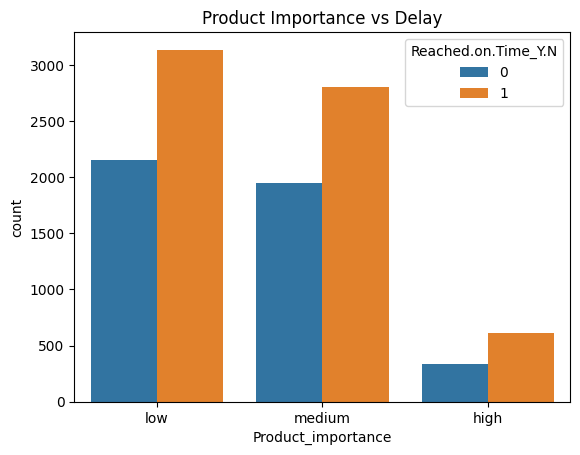

In [17]:
sns.countplot(data=df, x='Product_importance', hue='Reached.on.Time_Y.N')
plt.title('Product Importance vs Delay')
plt.show()

Conclusion:

Product with low importance has more delays

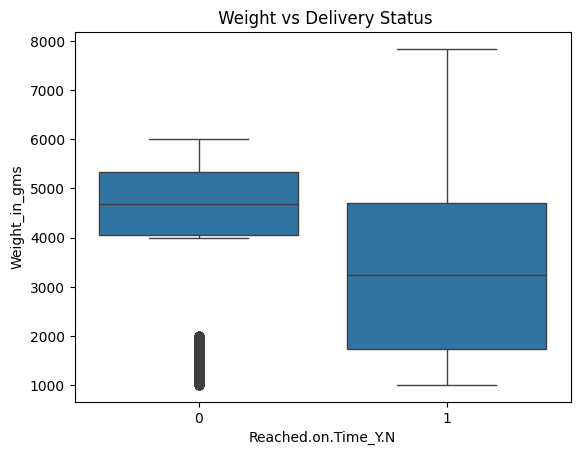

In [19]:
sns.boxplot(x='Reached.on.Time_Y.N', y='Weight_in_gms', data=df)
plt.title(' Weight vs Delivery Status')
plt.show()

Conclusion:

Tells us Do heavier products face more delays

Products with low weight has not reached on time

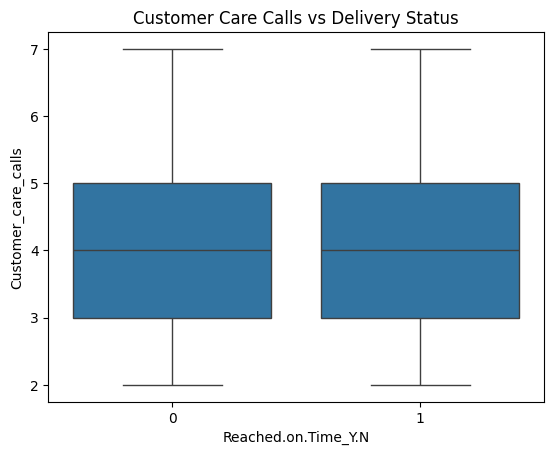

In [20]:
sns.boxplot(x='Reached.on.Time_Y.N', y='Customer_care_calls', data=df)
plt.title('Customer Care Calls vs Delivery Status')
plt.show()

Conclusion:

Equal distribution of customer calls for both

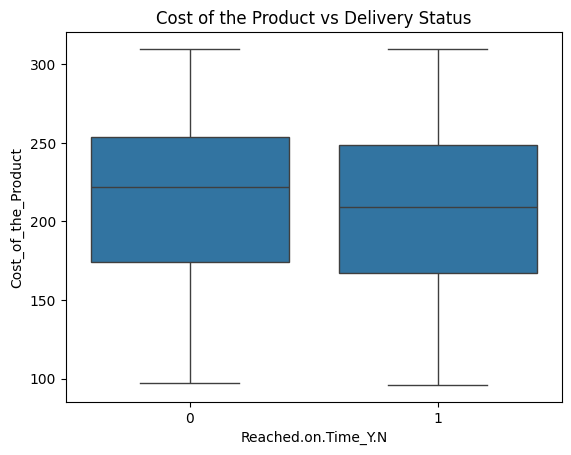

In [21]:
sns.boxplot(x='Reached.on.Time_Y.N', y='Cost_of_the_Product', data=df)
plt.title('Cost of the Product vs Delivery Status')
plt.show()

Conclusion:

Tells us Do more expensive items get priority delivery

Both have equal distribution

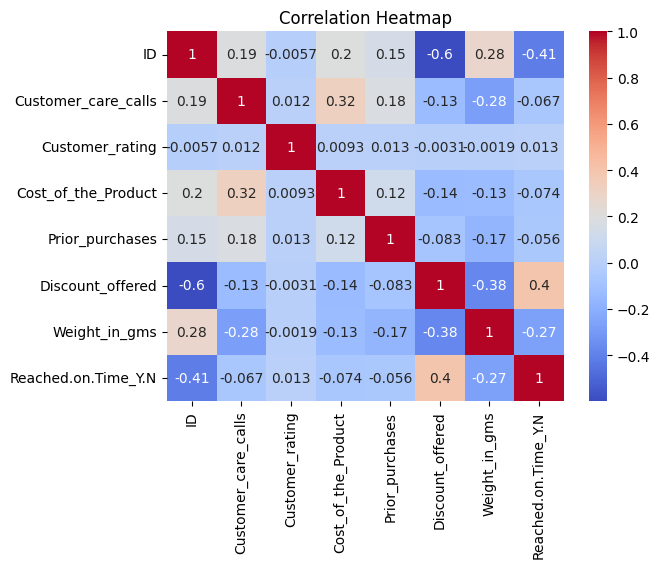

In [24]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [32]:
# Feature + target split
X = df.drop(["Reached.on.Time_Y.N", "ID"],axis=1)
y = df["Reached.on.Time_Y.N"]  # 0: On time, 1: Delayed

In [33]:
# Column categorization
# Nominal categorical features (require One-Hot Encoding)
categorical_nominal = ['Warehouse_block', 'Mode_of_Shipment', 'Gender']

# Ordinal categorical features (use OrdinalEncoder)
categorical_ordinal = ['Product_importance']

# Numerical features (no encoding needed)
numerical = ['Customer_care_calls', 'Cost_of_the_Product', 'Weight_in_gms',
             'Discount_offered', 'Prior_purchases', 'Customer_rating']

In [34]:
# Encoding
preprocessor = ColumnTransformer(transformers=[
    ('nominal', OneHotEncoder(drop='first'), categorical_nominal),
    ('ordinal', OrdinalEncoder(categories=[['low', 'medium', 'high']]), categorical_ordinal),
    ('num', 'passthrough', numerical)
])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

In [36]:
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominal',
                                                  OneHotEncoder(drop='first'),
                                                  ['Warehouse_block',
                                                   'Mode_of_Shipment',
                                                   'Gender']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['Product_importance']),
                                                 ('num', 'passthrough',
                                                  ['Customer_care_calls',
                                                   'Cost_of_the_Product',
                                                   'Weight_in_gms',
                                                   'Discount_offered',
                                                   'Prior_purchases',
                                                   'Customer_rating'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[639 248]
 [493 820]]
              precision    recall  f1-score   support

           0       0.56      0.72      0.63       887
           1       0.77      0.62      0.69      1313

    accuracy                           0.66      2200
   macro avg       0.67      0.67      0.66      2200
weighted avg       0.69      0.66      0.67      2200



In [38]:
from sklearn.linear_model import LogisticRegression

model = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominal',
                                                  OneHotEncoder(drop='first'),
                                                  ['Warehouse_block',
                                                   'Mode_of_Shipment',
                                                   'Gender']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['Product_importance']),
                                                 ('num', 'passthrough',
                                                  ['Customer_care_calls',
                                                   'Cost_of_the_Product',
                                                   'Weight_in_gms',
                                                   'Discount_offered',
                                                   'Prior_purchases',
                                                   'Customer_rating'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Logistic Pregression")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Pregression
[[523 364]
 [426 887]]
              precision    recall  f1-score   support

           0       0.55      0.59      0.57       887
           1       0.71      0.68      0.69      1313

    accuracy                           0.64      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.65      0.64      0.64      2200



In [42]:
from xgboost import XGBClassifier

model = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:40:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominal',
                                                  OneHotEncoder(drop='first'),
                                                  ['Warehouse_block',
                                                   'Mode_of_Shipment',
                                                   'Gender']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['Product_importance']),
                                                 ('num', 'passthrough',
                                                  ['Customer_care_calls',
                                                   'Cost_of_the_Product',
                                                   'Weight_in_gms',
                                                   'Discount_offered',
                                                   'Prior_purc...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("XGBoost")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

XGBoost
[[580 307]
 [475 838]]
              precision    recall  f1-score   support

           0       0.55      0.65      0.60       887
           1       0.73      0.64      0.68      1313

    accuracy                           0.64      2200
   macro avg       0.64      0.65      0.64      2200
weighted avg       0.66      0.64      0.65      2200



In [47]:
from sklearn.svm import SVC

model = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', SVC())
])
model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominal',
                                                  OneHotEncoder(drop='first'),
                                                  ['Warehouse_block',
                                                   'Mode_of_Shipment',
                                                   'Gender']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['Product_importance']),
                                                 ('num', 'passthrough',
                                                  ['Customer_care_calls',
                                                   'Cost_of_the_Product',
                                                   'Weight_in_gms',
                                                   'Discount_offered',
                                                   'Prior_purchases',
                                                   'Customer_rating'])])),
                ('classifier', SVC())])

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("SVM")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

SVM
[[574 313]
 [395 918]]
              precision    recall  f1-score   support

           0       0.59      0.65      0.62       887
           1       0.75      0.70      0.72      1313

    accuracy                           0.68      2200
   macro avg       0.67      0.67      0.67      2200
weighted avg       0.68      0.68      0.68      2200



In [49]:
from sklearn.neighbors import KNeighborsClassifier

model = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])
model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominal',
                                                  OneHotEncoder(drop='first'),
                                                  ['Warehouse_block',
                                                   'Mode_of_Shipment',
                                                   'Gender']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['Product_importance']),
                                                 ('num', 'passthrough',
                                                  ['Customer_care_calls',
                                                   'Cost_of_the_Product',
                                                   'Weight_in_gms',
                                                   'Discount_offered',
                                                   'Prior_purchases',
                                                   'Customer_rating'])])),
                ('classifier', KNeighborsClassifier())])

In [50]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("K nearest")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

K nearest
[[545 342]
 [436 877]]
              precision    recall  f1-score   support

           0       0.56      0.61      0.58       887
           1       0.72      0.67      0.69      1313

    accuracy                           0.65      2200
   macro avg       0.64      0.64      0.64      2200
weighted avg       0.65      0.65      0.65      2200



Coclusion:

So almost all models has accuray between 0.60 to 0.70 . For further improvement we can do hyper parameter tuning.